### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#запускаем все библиотеки, которые понадобятся нам в дальнейшем
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

В таблице 22 столбца и 23699 строк. Из 22 столбцов только 8(!) заполненны полностью, в остальных же есть пропущенные данные. С чего лучше всего и будет начинать.

### Шаг 2. Предобработка данных

### Заполняем пропуски
По порядку анализируем столбцы, проверяем есть ли пропуски или ошибки, в чем возможная причина ошибки, можем ли мы самостоятельно заполнить данные, если можем - то как? 

### 2.1 Высота потолков

In [2]:
# Первый столбец, который бросается в глаза - ceiling_height(высота потолков). Проверим этот столбец полностью
data['ceiling_height'].min()

1.0

In [3]:
data['ceiling_height'].max()

100.0

In [4]:
data['ceiling_height'].mean()

2.77149889685604

In [5]:
data['ceiling_height'].median()

2.65

#### Вывод:
Пропусков около 40%, это очень большой результат, который может повлиять на статистику. Среднее и медианное значение достаточно близки, но следует учитывать тот факт, что высота потолка зависит от застройщика, а не от средних данных, поэтому заполнение пропусков медианным или средним значением может исказить статистику.
Так же есть результаты, малопохожие на правду (потолки ниже 2 м. и выше 5 м. скорее всего выбросы, появившееся в связи с неправильным заполнением данным, при анализе данного столбца - такие данные лучше отбросить).
Недостающие значения для удобства заменим на нули.

In [6]:
# Создадим новый датафрейм с названием data1, в котором будут сохраняться все изменения. После всех изменений - можно будет
# сравнить исходные данные с отредактированными.
data1 = data
data1["ceiling_height"] = data1['ceiling_height'].fillna(0)
data1.info()
data1.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### 2.2 Количество этажей

In [7]:
# floors_total - заполнено 23613 из 23699. Вероятно, данные были попросту не внесены из-за ошибки оператора.
data_floor = data
data_floor = data_floor.sort_values(by='floors_total', ascending=False)
data_floor.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18832,0,40348248.0,284.00,2016-11-24T00:00:00,4,0.0,NaN,104.76,6,NaN,...,14.77,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,256.0
19133,10,2903659.0,24.67,2018-10-10T00:00:00,1,0.0,NaN,16.00,6,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,136.0
19350,10,5249478.0,51.77,2018-11-04T00:00:00,2,0.0,NaN,22.00,6,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,111.0
19452,5,9500000.0,76.80,2019-04-11T00:00:00,3,0.0,NaN,NaN,10,NaN,...,NaN,NaN,Санкт-Петербург,36628.0,14780.0,0.0,NaN,0.0,NaN,NaN
20146,16,3850000.0,36.00,2018-10-12T00:00:00,1,0.0,NaN,19.00,15,NaN,...,8.50,NaN,посёлок Стрельна,28276.0,23454.0,0.0,NaN,0.0,NaN,183.0
20250,5,6060000.0,60.60,2015-10-29T00:00:00,2,2.8,NaN,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0
20738,5,4480000.0,54.22,2018-02-01T00:00:00,2,0.0,NaN,NaN,10,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,42.0
21273,3,6300000.0,70.02,2015-03-28T00:00:00,2,0.0,NaN,34.87,19,NaN,...,10.13,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,516.0
21651,4,7143060.0,44.70,2019-01-11T00:00:00,1,3.0,NaN,13.79,19,NaN,...,NaN,NaN,Санкт-Петербург,9222.0,11340.0,0.0,NaN,0.0,NaN,NaN
21753,7,6800000.0,57.00,2017-05-01T00:00:00,2,0.0,NaN,NaN,21,NaN,...,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0


In [8]:
# У пропущенных значений не прослеживается взаимосвязь, самостоятельно заполнить возможности нет, в связи с чем для удобства
# заменим все значения на 0, но помним про этот пункт при последующем анализе. Используем датафрейм data1
data1["floors_total"] = data1['floors_total'].fillna(0)
data1.info()
data1.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### 2.3 Площадь жилой части и площадь кухни.
В данных столбцах так же встречаются пропущенные значения. Самостоятельно заполнять пропуски будет ошибочным решением, т.к. среднее и медианное значение нам может не подойти из-за большой разницы в общих площадях квартир, возможно, следует высчитать среднее отношение жилой и куханной площади к общей и на основании средних данных заполнить пропуски, но к этому мы вернемся чуть позже

### 2.4 Аппартаменты
Заполнено всего 2775, вероятная причина - квартиры, не являющиеся аппартаментами просто не всегда указывались, данный этап был пропущен. Заполним все пропущенные значения вариантом False.

In [9]:
data1["is_apartment"] = data1['is_apartment'].fillna(False)
data1.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [10]:
data1['is_apartment'].value_counts()
data1['is_apartment']=data1['is_apartment'].astype('int')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### 2.5 Балкон
Заполнено всего 12180 значений. Скорее всего при отсутствие балкона в квартире - данные просто не были занесены, в связи с чем переведем все пустые строки к значению 0.

In [11]:
data1['balcony'] = data1['balcony'].fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### 2.6 Расстояние до аэропорта и центра города

In [12]:
data_airports = data1.query('airports_nearest == "NaN"')
data_airports['locality_name'].value_counts().head(30)

посёлок Мурино               522
Всеволожск                   398
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Санкт-Петербург               85
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
деревня Старая                64
городской посёлок Янино-1     61
Шлиссельбург                  57
Луга                          56
Тихвин                        49
поселок Бугры                 45
посёлок Тельмана              39
поселок Романовка             36
Волосово                      36
Name: loca

In [13]:
data_airports['locality_name'].value_counts().tail(30)

коттеджный поселок Кивеннапа Север                         1
деревня Пикколово                                          1
посёлок Коробицыно                                         1
деревня Борисова Грива                                     1
посёлок при железнодорожной станции Вещево                 1
поселок Перово                                             1
деревня Котлы                                              1
деревня Каськово                                           1
посёлок при железнодорожной станции Приветнинское          1
поселок станции Корнево                                    1
деревня Лаврики                                            1
поселок Жилгородок                                         1
поселок Гаврилово                                          1
поселок станции Лужайка                                    1
коттеджный посёлок Лесное                                  1
село Никольское                                            1
деревня Шпаньково       

In [14]:
data_city_centers = data1.query('cityCenters_nearest == "NaN"')
data_city_centers['locality_name'].value_counts().head(30)

посёлок Мурино               522
Всеволожск                   398
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Кириши                       125
Сланцы                       112
Волхов                       111
Кингисепп                    104
Тосно                        104
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
деревня Старая                64
городской посёлок Янино-1     61
Санкт-Петербург               61
Шлиссельбург                  57
Луга                          56
Тихвин                        49
поселок Бугры                 45
посёлок Тельмана              39
поселок Романовка             36
Волосово                      36
Name: loca

In [15]:
data_city_centers['locality_name'].value_counts().tail(30)

коттеджный поселок Кивеннапа Север                         1
деревня Пикколово                                          1
посёлок Коробицыно                                         1
деревня Борисова Грива                                     1
посёлок при железнодорожной станции Вещево                 1
поселок Перово                                             1
деревня Котлы                                              1
деревня Каськово                                           1
посёлок при железнодорожной станции Приветнинское          1
поселок станции Корнево                                    1
деревня Лаврики                                            1
поселок Жилгородок                                         1
поселок Гаврилово                                          1
поселок станции Лужайка                                    1
коттеджный посёлок Лесное                                  1
село Никольское                                            1
деревня Шпаньково       

Вывод следующий - расстояния до аэропорта или центра города отсутствуют у тех квартир, которые находятся в некрупных городах, скорее всего не имеющих поблизости аэропортов и без четко обозначенного центра города. В связи с чем - нет смысла заполнять пропуски в данных, огромные расстояния до аэропорта или, наоборот, минимальные расстояния до центра города только собьют нам всю статистику.

### 2.7 Парки и водоемы поблизости
В столбцах, где указано количество парков и водоемов в радиусе 3000м - так же достаточно пропусков. Самая вероятная причина - аналогично аэропортам, скорее всего при отсутствии парков и водоемов в нужном радиуса данные просто вносились не всегда. В связи с чем пустые значения заменяем на 0.

In [16]:
data1['parks_around3000'] = data1['parks_around3000'].fillna(0)
data1['ponds_around3000'] = data1['ponds_around3000'].fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Теперь проверим следующую теорию: если поблизости нет парков - то и расстояния до ближайшего парка не указано, тем самым мы объясним пропуски в строке parks_nearest

In [17]:
data_parks = data1.query('parks_around3000 == 0')
data_parks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15624 entries, 1 to 23698
Data columns (total 22 columns):
total_images            15624 non-null int64
last_price              15624 non-null float64
total_area              15624 non-null float64
first_day_exposition    15624 non-null object
rooms                   15624 non-null int64
ceiling_height          15624 non-null float64
floors_total            15624 non-null float64
living_area             14298 non-null float64
floor                   15624 non-null int64
is_apartment            15624 non-null int64
studio                  15624 non-null bool
open_plan               15624 non-null bool
kitchen_area            14036 non-null float64
balcony                 15624 non-null float64
locality_name           15590 non-null object
airports_nearest        10102 non-null float64
cityCenters_nearest     10106 non-null float64
parks_around3000        15624 non-null float64
parks_nearest           4 non-null float64
ponds_around3000  

Итого - у нас всего 4 значения, в которых пропущенные данные не связаны с тем, что парков рядом нет. Скорее всего причина - ошибка пользователя при вводе данных, либо расстояния до парка не удалось вычислить (например, могло быть указано некорректное название, либо напротив - пользователь указал нулевое количество парков, но на основании картографических данных расстояние было высчитано автоматически).
Теперь проверим расстояние до водоемов

In [18]:
# Попробуем немного по-другому, на этот раз мы проверим квартиры, которые имеют водоемы в радиусе 3000 м
data_ponds = data1.query('ponds_around3000 != 0')
data_ponds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9110 entries, 0 to 23697
Data columns (total 22 columns):
total_images            9110 non-null int64
last_price              9110 non-null float64
total_area              9110 non-null float64
first_day_exposition    9110 non-null object
rooms                   9110 non-null int64
ceiling_height          9110 non-null float64
floors_total            9110 non-null float64
living_area             8415 non-null float64
floor                   9110 non-null int64
is_apartment            9110 non-null int64
studio                  9110 non-null bool
open_plan               9110 non-null bool
kitchen_area            8266 non-null float64
balcony                 9110 non-null float64
locality_name           9085 non-null object
airports_nearest        9102 non-null float64
cityCenters_nearest     9110 non-null float64
parks_around3000        9110 non-null float64
parks_nearest           4824 non-null float64
ponds_around3000        9110 non-n

Итого, у каждой квартиры, имеющей водоем в радиусе 3000 м - указано расстояние до водоъема. В столбце ponds_nearest - 9110 результат, так же как и в самом первичным варианте датафрейма, а значит мы исключаем такие случаи, когда количество водоемов не было указано, но расстояние до них указано было.

В связи с чем, расстояние до парков и водоемов оставляем с пропусками, т.к. пропуски показывают тот факт, что парков и водоемов рядом нет.

### 2.8 Сколько дней было размещено объявление. 
Согласно данным, заполнено всего 20518 значений, а значит часть данных остутствует(всего 23699 квартир). Логично было бы предположить - если количество дней не указано, то объявление еще акутально, а значит можно высчитать количество дней, вычев из сегодняшней даты дату размещения объявления. Но т.к. это архив, то здесь хранятся уже закрытые объявления, а значит этот путь нам не подойдет. 
Возможно, пропуски обоснованы потерей данных либо некорректным вводом даты закрытия (из-за чего автоматически не удалось посчитать форуму "дата закрытия - дата размещения"). Либо данные о закрытии были введены не все. Такую информацию следует запросить, но в условиях данной работы - заменим значения на медианное по всему столбцу.

In [19]:
data1['days_exposition'].median()

95.0

In [20]:
data1['days_exposition'] = data1['days_exposition'].fillna(95)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### 2.9 Проверим дубликаты

In [21]:
data1.duplicated().sum()

0

Нет дубликатов, соответствено ничего удалять и не надо.

### 2.10 Формат ячеек

In [22]:
data1.info()
data1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,0,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11.0,18.60,1,0,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5.0,34.30,4,0,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12.0,14.40,5,0,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26.0,10.60,6,0,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24.0,NaN,22,0,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27.0,15.43,26,0,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,0,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [23]:
# Для удобства переведем булевые столбцы в численные
data1['studio'] = data1['studio'].astype('int')
data1['open_plan'] = data1['open_plan'].astype('int')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null int64
open_plan               23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3

In [24]:
# Для удобства восприятия переведем столбцы balcony, floors_total, parks_around3000, ponds_around3000, days_exposition в формат int.
data1['balcony'] = data1['balcony'].astype('int')
data1['floors_total'] = data1['floors_total'].astype('int')
data1['parks_around3000'] = data1['parks_around3000'].astype('int')
data1['ponds_around3000'] = data1['ponds_around3000'].astype('int')
data1['days_exposition'] = data1['days_exposition'].astype('int')
data1.info()
data1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null int64
open_plan               23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,0,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,0.00,11,18.60,1,0,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,0.00,5,34.30,4,0,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,0.00,14,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,0,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,0.00,12,14.40,5,0,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,0.00,26,10.60,6,0,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,0.00,24,NaN,22,0,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,95
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,0.00,27,15.43,26,0,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,0,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


In [25]:
# Переведем столбец first_day_exposition к формату datetime
data1['first_day_exposition'] = pd.to_datetime(data1['first_day_exposition'], format='%Y.%m.%d')
data1.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.40,2018-12-04,1,0.00,11,18.60,1,0,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,0.00,5,34.30,4,0,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,0.00,14,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,0.00,12,14.40,5,0,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,0.00,26,10.60,6,0,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,0.00,24,NaN,22,0,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,95
8,20,2900000.0,33.16,2018-05-23,1,0.00,27,15.43,26,0,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null int64
open_plan               23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_aroun

## Вывод:
Таблица приобрела более удобный для восприятия вид, часть недостающих данных мы заполнили, но при этом часть данных оставили пропусками, что следует учесть и отсекать при последующих обработке и анализе.

### Шаг 3. Посчитайте и добавьте в таблицу

In [27]:
# Посчитаем цену за квадратный метр
data1['per_square_meter_price'] = data1['last_price'] / data1['total_area']
data1.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,0.00,11,18.60,1,0,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,0.00,5,34.30,4,0,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,0.00,14,NaN,9,0,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,0.00,12,14.40,5,0,...,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,0.00,26,10.60,6,0,...,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,0.00,24,NaN,22,0,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,95,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,0.00,27,15.43,26,0,...,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.590164


In [28]:
data1['per_square_meter_price'].mean()

99421.65639461846

In [29]:
data1['per_square_meter_price'].median()

95000.0

In [30]:
data1['per_square_meter_price'].min()

111.8348623853211

In [31]:
data1['per_square_meter_price'].max()

1907500.0

Среднее и медианное значения достаточно близки. Максимальное и минимальные значения 1907500 и 111 - вероятные ошибки, возможно данные были введены некорректно, либо данные были умешлено искажены), а значит данным следует уделить особое внимание при анализе. Отсекать сейчас все лишнее не стоит - могут пропасть нужные данные в других столбцах.

In [32]:
# Добавим день недели, месяц и год публикации объявления
data1['weekday'] = data1['first_day_exposition'].dt.weekday
data1['month'] = data1['first_day_exposition'].dt.month
data1['year'] = data1['first_day_exposition'].dt.year
data1.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,...,16028.0,1,482.0,2,755.0,95,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,0.00,11,18.60,1,0,...,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,0.00,5,34.30,4,0,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,0.00,14,NaN,9,0,...,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,...,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,0.00,12,14.40,5,0,...,NaN,0,NaN,0,NaN,55,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,0.00,26,10.60,6,0,...,19143.0,0,NaN,0,NaN,155,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,0.00,24,NaN,22,0,...,11634.0,0,NaN,0,NaN,95,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,0.00,27,15.43,26,0,...,NaN,0,NaN,0,NaN,189,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,...,15008.0,0,NaN,0,NaN,289,88524.590164,6,2,2017


In [33]:
data1['weekday'].value_counts()

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64

Интересный факт, по выходным объявлений размещают меньше всего. Возможно, потому что агентства в эти дни отдыхают?

In [34]:
data1['month'].value_counts()

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64

Больше всего объявлений в начале года и в конца года, но при этом январь, май и декабрь самый маленькие по показаниям. Интересно, но наличие праздничных дней влияют на количество размещенных объявлений.

In [35]:
data1['year'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year, dtype: int64

К 17-18 гг. количество объявлений резко подскочило. К 19 г. количество объявлений резко упало (но, возможно, статистика за 19 год была неполной, возможно срез по данным был лишь в начале 19 года).

In [36]:
# Добавим наименование этажей: первый, последний и другой
# Для этого создадим функцию, которая сравнивает номер этажа с количеством этажей, либо, если это 1 - возвращает результат
# "первый", либо, если номер этажа совпадает с количеством этажей - результат "последний"
# Во всех иных случаях результатом будет "другой"
def floors_number(data):
    for rows in data:
        total = data['floors_total']
        floor = data['floor']
        if total == floor:
            return 'последний'
        elif floor == 1:
            return 'первый'
        else:
            return 'другой'
data1['floor_name'] = data1.apply(floors_number, axis = 1)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year,floor_name
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,0,...,1,482.0,2,755.0,95,120370.370370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,0.00,11,18.60,1,0,...,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,0.00,5,34.30,4,0,...,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,0.00,14,NaN,9,0,...,2,84.0,3,234.0,424,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,0,...,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,0.00,12,14.40,5,0,...,0,NaN,0,NaN,55,95065.789474,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,0.00,26,10.60,6,0,...,0,NaN,0,NaN,155,99195.710456,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,0.00,24,NaN,22,0,...,0,NaN,0,NaN,95,110544.692737,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,0.00,27,15.43,26,0,...,0,NaN,0,NaN,189,87454.764777,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,0,...,0,NaN,0,NaN,289,88524.590164,6,2,2017,другой


In [37]:
data1['floor_name'].value_counts()

другой       17446
последний     3361
первый        2892
Name: floor_name, dtype: int64

Разница в количестве между первым и последним этажом не сильно высокая, но суммарно они составляют более 25% от общего числа (с учетом того, что в среднем в домах более 5 этажей, можно смело заявлять - что первые и последние этажи самые ходовые). 

In [38]:
# Высчитаем соотношений жилой площади к общей площади
data1['living_from_total'] = data1['living_area'] / data1['total_area']
data1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year,floor_name,living_from_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,482.0,2,755.0,95,120370.370370,3,3,2019,другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,0.00,11,18.6,1,0,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,0.00,5,34.3,4,0,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,0.00,14,NaN,9,0,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000


In [39]:
# Теперь соотношение кухни к общей площади
data1['kitchen_from_total'] = data1['kitchen_area'] / data1['total_area']
data1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year,floor_name,living_from_total,kitchen_from_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,2,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,0.00,11,18.6,1,0,...,0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,0.00,5,34.3,4,0,...,2,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,0.00,14,NaN,9,0,...,3,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


In [40]:
data1['living_from_total'].mean()

0.5647655216993234

In [41]:
data1['living_from_total'].median()

0.5678598992678503

In [42]:
data1['living_from_total'].min()

0.02158273381294964

In [43]:
data1['living_from_total'].max()

1.0

In [44]:
data1['kitchen_from_total'].mean()

0.1873547387717406

In [45]:
data1['kitchen_from_total'].median()

0.1724137931034483

In [46]:
data1['kitchen_from_total'].min()

0.025380710659898477

In [47]:
data1['kitchen_from_total'].max()

0.7878787878787878

Максимальное соотношение жилой площади и общей площади - 1. Быть может в объявлении была ошибка, это продавалась не квартира, а комната, а, возможно, данные были внесены некорректно. 
Минимальное соотношение так же не внушает доверия - всего 2% от общего размера. Некорректно введены данные?
Для проверки попробуем суммировать оба столбца и проверим итог

In [48]:
data1['kitchen_and_living'] = data1['living_from_total'] + data1['kitchen_from_total']
data1['kitchen_and_living'].min()

0.1366906474820144

In [49]:
data1['kitchen_and_living'].max()

1.5757575757575757

Максимальное значение превышает единицу, т.к. суммарно площадь кухни и жилой части составляет 157% от общей площади квартиры? Однозначно, ошибка.
Минимальное значение вызывает аналогичные недоумение (всего 14% от общей площади?).

## Вывод:
Теперь в общей таблице мы можем сразу посмотреть цену за квадратный метр, отношений жилой площади и кухни к общей площади, а так же неделю, месяц, год публикации и этаж.
Больше всего бросаются в глаза несколько показателей:
    1. Очень неправдоподобные минимальная и максимальная цена за квадратный метр - данные явно требуют проверки
    2. Так же проверки требует и отношение жилой площади и кухни, т.к. некоторые значения тоже являются ошибками и требуют    более детального рассмотрения.
Часть данных предстоит срезать при анализе, иначе анализ статистики даст некорректные выводы.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1 Изучение площади, цены, количества комнат и высоты потолков

In [50]:
data1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year,floor_name,living_from_total,kitchen_from_total,kitchen_and_living
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481,0.703704
1,7,3350000.0,40.4,2018-12-04,1,0.00,11,18.6,1,0,...,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277,0.732673
2,10,5196000.0,56.0,2015-08-20,2,0.00,5,34.3,4,0,...,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214,0.760714
3,0,64900000.0,159.0,2015-07-24,3,0.00,14,NaN,9,0,...,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,0.730000


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

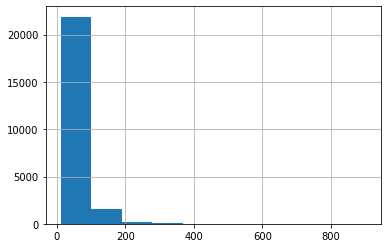

In [51]:
# Проанализируем общую площадь
data1['total_area'].hist()
data1['total_area'].describe()

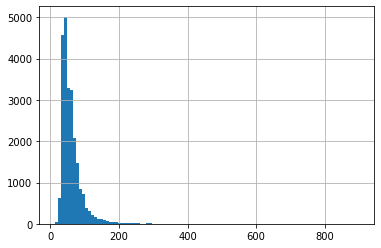

In [52]:
# Для борее корректного анализа следует увеличить количество корзин
data1['total_area'].hist(bins=100)

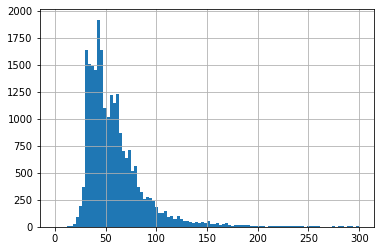

In [53]:
# после 300 значения идут в минимальном количестве и, скорее всего, являются выбросами. Для удобства отсекем все лишнее 
# и приведем гистограмму к финальному результату
data1['total_area'].hist(bins=100, range=(0, 300))

Основной пик приходится на значение 45 квадратных метров. Широкий пик так же построен вокруг этого значения. В целом, гистрограмма достаточно равномерна, но заметен длинный хвост, который влияет на среднее значение (для сравнения - среднее значение составляет 60, а медиана 52). 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

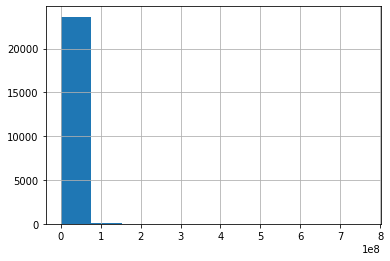

In [54]:
# Проанализируем цену
data1['last_price'].hist()
data1['last_price'].describe()

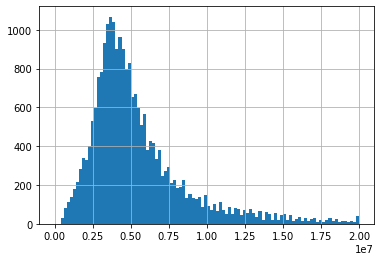

In [55]:
# За единицу взята стоимость в 10 миллионов, но это довольно неудобно для анализа. Очень длинный хвост не позваляет в полной
# мере проанализировать, потому все значения после 20 миллионов лучше отбросить
data1['last_price'].hist(bins=100, range=(0, 20000000))

Достаточно равномерная гистрограмма, но даже отбросив часть хвоста - остаток все-равно не малый, что говорит о большом разбросе в цене, но при этом самый пик как по максимуму, так и по ширине - 3,5 миллиона. 
Медианное значение - 4,6, в то время как среднее - 6,5, а значит в продаже были немного квартир с большой ценой, что увеличивало среднее значение, практически не меняя медианное. 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

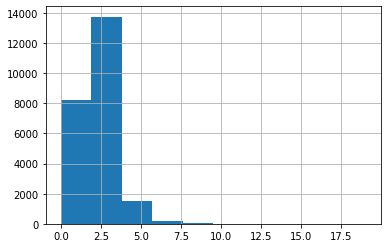

In [56]:
# Проанализируем число комнат
data1['rooms'].hist(bins=10)
data1['rooms'].describe()

In [57]:
# Есть результаты со значением 0. Для проверки правильности сделаем срез
data1.query('rooms == 0') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year,floor_name,living_from_total,kitchen_from_total,kitchen_and_living
144,1,2450000.0,27.00,2017-03-30,0,0.0,24,15.50,2,0,...,NaN,181,90740.740741,3,3,2017,другой,0.574074,NaN,NaN
349,4,2320000.0,25.00,2017-09-27,0,0.0,14,17.00,1,0,...,NaN,45,92800.000000,2,9,2017,первый,0.680000,NaN,NaN
440,8,2480000.0,27.11,2018-03-12,0,0.0,17,24.75,4,0,...,982.0,64,91479.158982,0,3,2018,другой,0.912947,NaN,NaN
508,0,3375000.0,34.40,2017-03-28,0,0.0,26,24.30,19,0,...,593.0,430,98110.465116,1,3,2017,другой,0.706395,NaN,NaN
608,2,1850000.0,25.00,2019-02-20,0,0.0,10,NaN,7,0,...,NaN,29,74000.000000,2,2,2019,другой,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,0.0,25,18.00,16,0,...,623.0,14,123076.923077,4,9,2017,другой,0.692308,NaN,NaN
23442,0,2500000.0,27.70,2017-09-28,0,0.0,24,18.00,4,0,...,NaN,4,90252.707581,3,9,2017,другой,0.649819,NaN,NaN
23554,15,3350000.0,26.00,2018-09-07,0,0.0,19,NaN,8,0,...,112.0,31,128846.153846,4,9,2018,другой,NaN,NaN,NaN
23592,10,1450000.0,29.00,2017-11-11,0,0.0,9,18.00,8,0,...,NaN,82,50000.000000,5,11,2017,другой,0.620690,NaN,NaN


Есть объявления, в которых количество комнат не указано, но при этом указана площадь жилых помещений. Данные объявления следует считать ошибочными, самостоятельно количество комнат восстановить у нас не получится, а значит, в гистограмме для удобства лучше отбрость нулевые значения. 

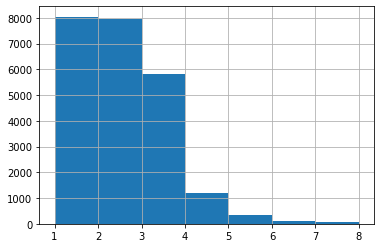

In [58]:
# Попробуем срез для квартир с количеством комнат меньше 9
data1['rooms'].hist(bins=7, range=(1, 8))

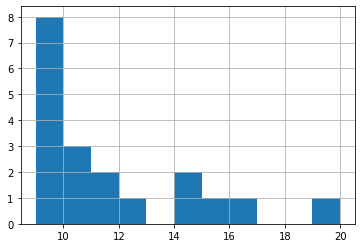

In [59]:
# Посмотрим срез для квартир от 8 комнат
data1['rooms'].hist(bins=11, range=(9, 20))

Большую часть составляют квартиру с 1 и 2 комнатами. Квартиры с 3 комнатами встречаются чуть реже, но их количество все равно преобладает. Квартиры от 6 и выше встречаются очень редко. Среднее и медианное значение практически совпадают, а значит данных в хвосте слишком мало, чтобы сильно повлиять на среднее значение.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

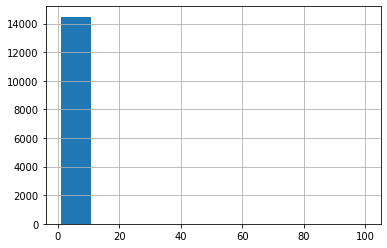

In [60]:
# Проанализируем высоту потолков
# Ранее, мы пустые значение в данном столбце заменили на 0, следовательно для анализа нам эти значения следует отбросить
ceiling_data = data1.query('ceiling_height > 0')
ceiling_data['ceiling_height'].hist()
ceiling_data['ceiling_height'].describe()

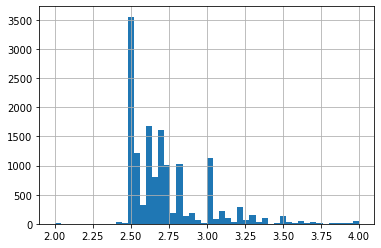

In [61]:
# Минимальное значение = 1, максимальное 100 - данные некорректные, а значит их можно отбросить. Скорее всего при вводе данных
# была допущена ошибка. Для корректного анализа возьмем размеры от 2 до 4 м.
ceiling_data['ceiling_height'].hist(bins=50, range=(2, 4))

Средняя высота потолков от 2,5 до 2,7 (подавляющее большинство за 2,5 м.). Потолки меньше 2,5 м. используются крайнее редко и, вполне вероятно, эти данные так же являются выбросами, но это не точно, поэтому при анализе мы их не убираем. В связи с достаточно длинным хвостом, но маленьким по количеству, медианное значение чуть меньше среднего (2,65 против 2,77), и то частично благодаря максимальному размеру (100), который является некорректными данными.

Создадим функцию, позволяющую автоматизировать составление графиков.

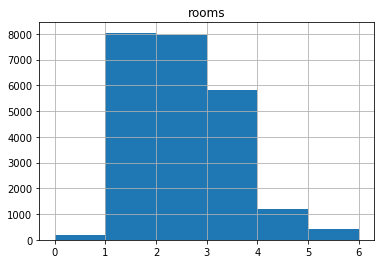

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


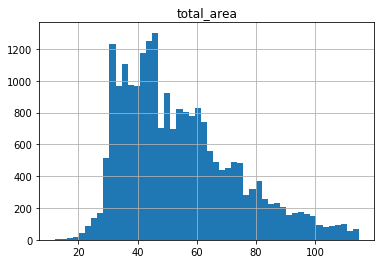

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


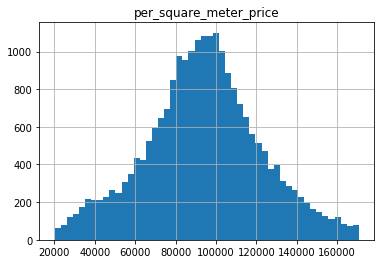

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: per_square_meter_price, dtype: float64


In [62]:
def new_print(list_of_columns):
    for column in list_of_columns:
        iqr = (data1[column].quantile(0.75) - data1[column].quantile(0.25))*1.5
        c = data1[column].quantile(0.25) - iqr
        if c < data1[column].min():
            c = data1[column].min()
        d = data1[column].quantile(0.75) + iqr
        if d > data1[column].max():
            d = data1[column].max()
        z = int(d-c)
        if z > 50:
            z = 50
                    
        data1.hist(column, bins=z, range=(c, d))
        plt.show()
        print(data1[column].describe())
new_print(['rooms', 'total_area', 'per_square_meter_price'])

#### 4.2 Анализ времени продажи

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

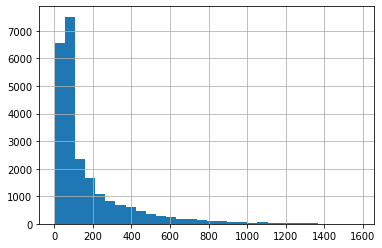

In [63]:
# Анализируем время продажи квартиры
data1['days_exposition'].hist(bins=30)
data1['days_exposition'].describe()

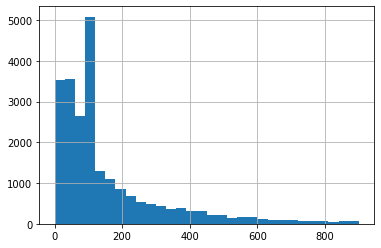

In [64]:
# Уберем хвост с аномально долгими продажами
data1['days_exposition'].hist(bins=30, range=(0, 900))

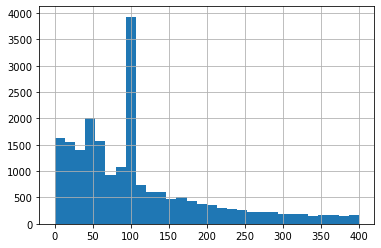

In [65]:
data1['days_exposition'].hist(bins=30, range=(0, 400))

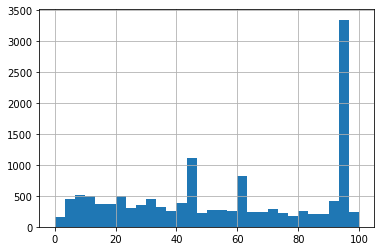

In [66]:
data1['days_exposition'].hist(bins=30, range=(0, 100))

Среднее время продажи 90-100 дней, т.е. примерно 3 месяца. Но так отчетливо проявляются и быстрые продажи квартиры, коих тоже не мало, в сроки от 45 до 60 дней. Среднее 169 дней, в то время как медиана 95. Разница почти в два раза связаны с аномально долгими продажами некоторых вариантов (достаточно много квартир продавались до 1400 дней, а максимальный срок составил 1580 дней). 
Быстрыми продажами следует считать продажи в срок до 60 дней, среднее время продажи 60-120 дней, все остальное уже достаточно долгие продажи. 

### 4.3 Редкие и выбивающиеся значения

In [67]:
data1.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,per_square_meter_price,weekday,month,year,floor_name,living_from_total,kitchen_from_total,kitchen_and_living
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,755.0,95,120370.370370,3,3,2019,другой,0.472222,0.231481,0.703704
1,7,3350000.0,40.4,2018-12-04,1,0.00,11,18.6,1,0,...,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277,0.732673
2,10,5196000.0,56.0,2015-08-20,2,0.00,5,34.3,4,0,...,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214,0.760714
3,0,64900000.0,159.0,2015-07-24,3,0.00,14,NaN,9,0,...,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,0.730000


In [68]:
# Удалим потолки, высота которых менее 2,3 м., но более 3,5., эти данные однозначно ошибочны
# Следует помнить, что значения 0 - это заполненные пропуски, а значит их следует оставить
good_data = data1.query('ceiling_height == 0 or 2.3 < ceiling_height < 3.5')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23245 entries, 0 to 23698
Data columns (total 30 columns):
total_images              23245 non-null int64
last_price                23245 non-null float64
total_area                23245 non-null float64
first_day_exposition      23245 non-null datetime64[ns]
rooms                     23245 non-null int64
ceiling_height            23245 non-null float64
floors_total              23245 non-null int64
living_area               21371 non-null float64
floor                     23245 non-null int64
is_apartment              23245 non-null int64
studio                    23245 non-null int64
open_plan                 23245 non-null int64
kitchen_area              21007 non-null float64
balcony                   23245 non-null int64
locality_name             23198 non-null object
airports_nearest          17748 non-null float64
cityCenters_nearest       17768 non-null float64
parks_around3000          23245 non-null int64
parks_nearest        

Высоту потолков мы отредактировали, теперь в датафрейме не 23699 строк, а 23245.
Теперь отредактируем общую площадь.

In [69]:
# Удалим все значения, в которых площадь больше 200 м2.
good_data = good_data.query('total_area < 200')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23074 entries, 0 to 23698
Data columns (total 30 columns):
total_images              23074 non-null int64
last_price                23074 non-null float64
total_area                23074 non-null float64
first_day_exposition      23074 non-null datetime64[ns]
rooms                     23074 non-null int64
ceiling_height            23074 non-null float64
floors_total              23074 non-null int64
living_area               21224 non-null float64
floor                     23074 non-null int64
is_apartment              23074 non-null int64
studio                    23074 non-null int64
open_plan                 23074 non-null int64
kitchen_area              20859 non-null float64
balcony                   23074 non-null int64
locality_name             23027 non-null object
airports_nearest          17580 non-null float64
cityCenters_nearest       17600 non-null float64
parks_around3000          23074 non-null int64
parks_nearest        

Уже не 23245, а 23074 значения, а значит почти 200 значений имели аномально большую площадь.

In [70]:
# Ранее мы подметили квартиры, с аномальными размерами кухни и жилой площади, обработаем и такие данные.
# Уберем те квартиры, где жилая и кухонная площадь либо меньше половины всей площади, либо больше 95%
good_data = good_data.query('0.5 < kitchen_and_living < 0.95')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20159 entries, 0 to 23698
Data columns (total 30 columns):
total_images              20159 non-null int64
last_price                20159 non-null float64
total_area                20159 non-null float64
first_day_exposition      20159 non-null datetime64[ns]
rooms                     20159 non-null int64
ceiling_height            20159 non-null float64
floors_total              20159 non-null int64
living_area               20159 non-null float64
floor                     20159 non-null int64
is_apartment              20159 non-null int64
studio                    20159 non-null int64
open_plan                 20159 non-null int64
kitchen_area              20159 non-null float64
balcony                   20159 non-null int64
locality_name             20122 non-null object
airports_nearest          15602 non-null float64
cityCenters_nearest       15620 non-null float64
parks_around3000          20159 non-null int64
parks_nearest        

20159 значение вместо предыдущих 23074. Почти 3000 значений с вероятной ошибкой в заполнении.

#### Вывод: 
Таким образом мы убрали те аномалии, что были подмечены ранее, теперь правильность заполнения в таблицы вызывает все меньше сомнений. Но в итоге вышло 20159 результатов вместо бывших 23699 (3410 результатов было упущено, а это практически 15% от общей таблицы). 15%? Если так, то анализ всей статистики мог быть сильно искажен

### 4.4 Изучаем зависимость цены

In [71]:
# Создадим матрицу, в которой можно будет сравнить зависимость общей цены и цены за квадратный метр от площади, числа комнат и 
# отдаленности от центра
good_data_price = good_data[{'last_price', 'per_square_meter_price', 'total_area', 'rooms', 'cityCenters_nearest'}]
good_data_price.head(15)

,total_area,last_price,cityCenters_nearest,rooms,per_square_meter_price
0,108.00,13000000.0,16028.0,3,120370.370370
1,40.40,3350000.0,18603.0,1,82920.792079
2,56.00,5196000.0,13933.0,2,92785.714286
4,100.00,10000000.0,8098.0,2,100000.000000
5,30.40,2890000.0,NaN,1,95065.789474
6,37.30,3700000.0,19143.0,1,99195.710456
8,33.16,2900000.0,NaN,1,87454.764777
9,61.00,5400000.0,15008.0,3,88524.590164
10,39.60,5050000.0,13878.0,1,127525.252525
11,44.00,3300000.0,51677.0,2,75000.000000


In [72]:
good_data_price.corr()

,total_area,last_price,cityCenters_nearest,rooms,per_square_meter_price
total_area,1.000000,0.680711,-0.232546,0.792118,0.248396
last_price,0.680711,1.000000,-0.280581,0.396670,0.794805
cityCenters_nearest,-0.232546,-0.280581,1.000000,-0.160612,-0.341785
rooms,0.792118,0.396670,-0.160612,1.000000,-0.007934
per_square_meter_price,0.248396,0.794805,-0.341785,-0.007934,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11199ca390>,
      dtype=object)

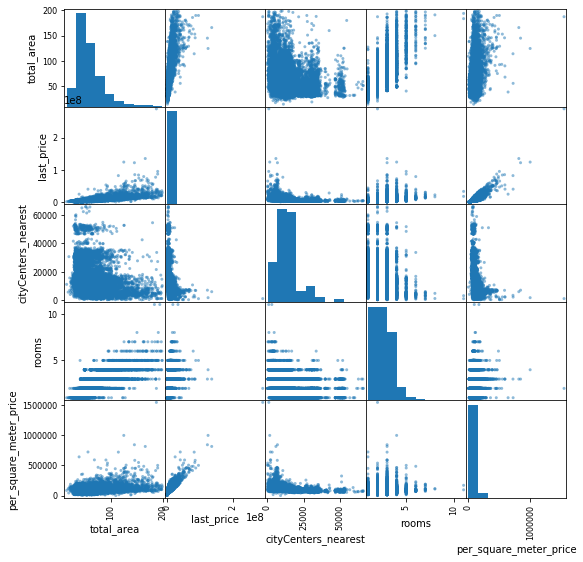

In [73]:
pd.plotting.scatter_matrix(good_data_price, figsize=(9, 9))

#### Вывод:
Можно сделать следующие выводы:
    1. Самые дорогие квартиры с 3 комнатами, но с увелечнием/уменьшением количества комнат цена всегда становится меньше
    2. Чем больше площадь квартиры, тем больше и стоимость, что вполне логично. Но при этом цена за вкадратный метр увеличивается не так сильно (коэффициент корреляции 0.24, в то время как у общей цены - 0.68).
    3. Чем ближе к центру города, тем квартиры дороже (в большей мере это влияет на цену за квадрат, чем на общую цену за квартиру), но коэффициент корреляции достаточно низок, а значит и разброс не самый высокий.
    4. Цена за квадрат и общая цена взаимосвязаны, у дорогих квартир и цена за квадратный метр куда выше (что говорит о влиянии третих факторов, которые тоже следует учесть, потому что в итоге не только общая площадь отвечает за стоимость).
    5. Чем дальше от центра города - тем меньше шанс найти квартиру с большим количеством комнату. Квартиры с количеством комнат больше 5 - сосредоточены в основном недалеко от центра. 

In [74]:
# Проверим зависимость цены от этажа
# Уберем все нулевые значения, чтобы оставить в таблице только те квартиры, у которых этаж был указан
good_data_floor = good_data.query('floor != 0')
good_data_floor = good_data_floor[{'last_price', 'per_square_meter_price', 'floor_name'}]
good_data_floor.head(15)

,per_square_meter_price,last_price,floor_name
0,120370.370370,13000000.0,другой
1,82920.792079,3350000.0,первый
2,92785.714286,5196000.0,другой
4,100000.000000,10000000.0,другой
5,95065.789474,2890000.0,другой
6,99195.710456,3700000.0,другой
8,87454.764777,2900000.0,другой
9,88524.590164,5400000.0,другой
10,127525.252525,5050000.0,другой
11,75000.000000,3300000.0,другой


In [75]:
# Для удобства анализа - создадим отдельный столбец, в котором название этажа переведем в численный формат
# Создадим отдельный датасет без столбца floor_name + создадим словарь для этих столбцов
def floor_numbers(data):
    for row in data:
        floors = data['floor_name']
        if 'другой' in floors:
            return 1
        elif 'последний' in floors:
            return 2
        elif 'первый' in floors:
            return 0
good_data_floor['floors_numbers'] = good_data_floor.apply(floor_numbers, axis = 1)
good_data_floor_dict = good_data_floor[['floor_name', 'floors_numbers']]
good_data_floor_dict = good_data_floor_dict.drop_duplicates().reset_index(drop=True).sort_values('floors_numbers', ascending=True)
good_data_floor = good_data_floor[['last_price', 'per_square_meter_price', 'floors_numbers']]
good_data_floor.head(15)

,last_price,per_square_meter_price,floors_numbers
0,13000000.0,120370.370370,1
1,3350000.0,82920.792079,0
2,5196000.0,92785.714286,1
4,10000000.0,100000.000000,1
5,2890000.0,95065.789474,1
6,3700000.0,99195.710456,1
8,2900000.0,87454.764777,1
9,5400000.0,88524.590164,1
10,5050000.0,127525.252525,1
11,3300000.0,75000.000000,1


In [76]:
good_data_floor_dict.head()

,floor_name,floors_numbers
1,первый,0
0,другой,1
2,последний,2


In [77]:
good_data_floor.corr()

,last_price,per_square_meter_price,floors_numbers
last_price,1.000000,0.794805,0.041347
per_square_meter_price,0.794805,1.000000,0.036852
floors_numbers,0.041347,0.036852,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1115f358d0>,
      dtype=object)

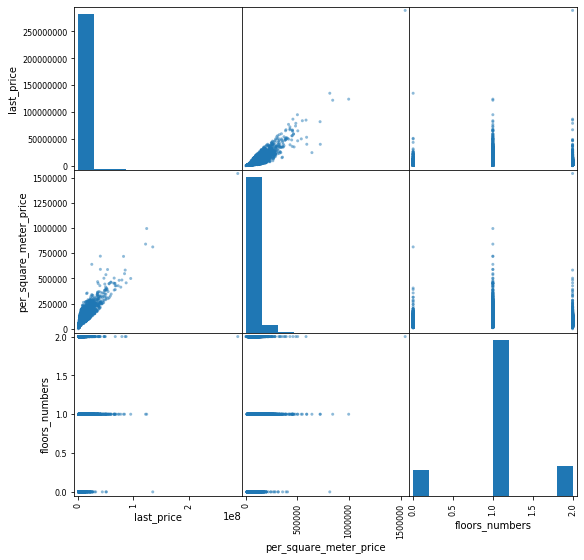

In [78]:
pd.plotting.scatter_matrix(good_data_floor, figsize = (9, 9))

#### Вывод:
Квартиры на первом этаже, как правило, более дешевые, в средний диапозон попадают квартиры на последнем этаже, квартиры не на первом и не на последнем этаже самые дорогие. Но даже тут можно встретить исключения (скорее всего влияние третьих факторов).

In [79]:
# Изучим зависимость цены от недели, месяца и года публикации
good_data_days = good_data[['last_price', 'per_square_meter_price', 'weekday', 'month', 'year']]
good_data_days.head(15)

,last_price,per_square_meter_price,weekday,month,year
0,13000000.0,120370.370370,3,3,2019
1,3350000.0,82920.792079,1,12,2018
2,5196000.0,92785.714286,3,8,2015
4,10000000.0,100000.000000,1,6,2018
5,2890000.0,95065.789474,0,9,2018
6,3700000.0,99195.710456,3,11,2017
8,2900000.0,87454.764777,2,5,2018
9,5400000.0,88524.590164,6,2,2017
10,5050000.0,127525.252525,3,11,2017
11,3300000.0,75000.000000,0,8,2018


In [80]:
good_data_days.corr()

,last_price,per_square_meter_price,weekday,month,year
last_price,1.000000,0.794805,-0.012580,0.000528,-0.032063
per_square_meter_price,0.794805,1.000000,-0.014577,-0.004393,0.032748
weekday,-0.012580,-0.014577,1.000000,0.009215,-0.006621
month,0.000528,-0.004393,0.009215,1.000000,-0.256515
year,-0.032063,0.032748,-0.006621,-0.256515,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1114356810>,
      dtype=object)

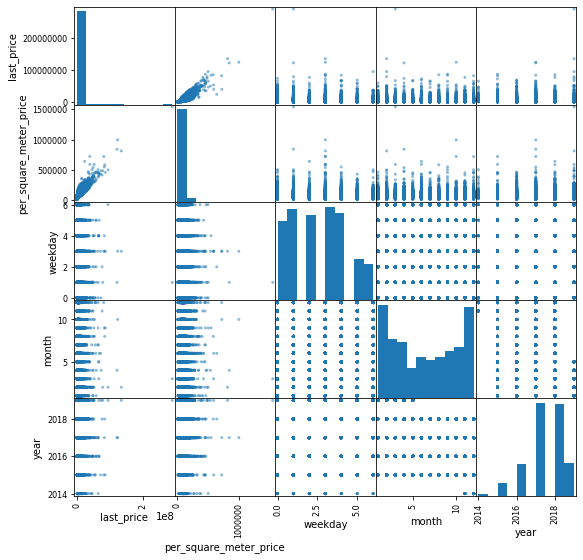

In [81]:
pd.plotting.scatter_matrix(good_data_days, figsize=(9, 9))

#### Вывод:
В среднем статистика более-менее равномерная, особенно что касается дня недели и месяца. По субботам выставляются объявления с более дешевым квартирами, это правило применимо и к объявлениям в январе. Возможно, в эти дни объявления выкладывают частные продавцы и нет надценки от агентств.
Что касаемо года публикации - можно заметить рост стоимости квартир от 14 г., самый пик которого приходится на 17 г. После 17 г. заметен небольшой спад по стоимости, но и он не опускается до уровня 14 г.

### 4.5 Пункты с наибольшим числом объявлений

In [82]:
# Найдем 10 населенных пунктов с наибольшим числом объявлений
# Создадим список top_name куда будет входить первая десятка
top_name = good_data['locality_name'].value_counts().head(10)
top_name

Санкт-Петербург      13418
посёлок Мурино         396
посёлок Шушары         389
Всеволожск             346
Пушкин                 321
Колпино                318
посёлок Парголово      286
Гатчина                284
деревня Кудрово        223
Петергоф               186
Name: locality_name, dtype: int64

In [83]:
# Сделаем срез по индексам из списка top_name
good_data_top = good_data.query('locality_name in @top_name.index')
good_data_top['locality_name'].value_counts()

Санкт-Петербург      13418
посёлок Мурино         396
посёлок Шушары         389
Всеволожск             346
Пушкин                 321
Колпино                318
посёлок Парголово      286
Гатчина                284
деревня Кудрово        223
Петергоф               186
Name: locality_name, dtype: int64

In [84]:
good_data_top_pivot = good_data_top.pivot_table(index='locality_name', values='per_square_meter_price', aggfunc='mean')
good_data_top_pivot

,per_square_meter_price
locality_name,
Всеволожск,68846.033624
Гатчина,68765.501467
Колпино,75294.469313
Петергоф,83473.798828
Пушкин,102807.453137
Санкт-Петербург,111885.693122
деревня Кудрово,92102.478396
посёлок Мурино,85174.644965
посёлок Парголово,90638.205026


In [85]:
good_data_top_pivot.sort_values(by='per_square_meter_price', ascending=True)

,per_square_meter_price
locality_name,
Гатчина,68765.501467
Всеволожск,68846.033624
Колпино,75294.469313
посёлок Шушары,78491.826757
Петергоф,83473.798828
посёлок Мурино,85174.644965
посёлок Парголово,90638.205026
деревня Кудрово,92102.478396
Пушкин,102807.453137


#### Вывод:
Самые дорогие квартиры находятся в Санкт-Петербурге, самые дешевые в Гатчине и Всеволожске (разница в стоимости за квадратный метр почти в 2 раза!).

### 4.6 Центр Санкт-Петербурга

In [86]:
# Оставим только объявления по Санкт-Петербургу и уберем объявления без расстояния до центра города
good_data_centers = good_data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest != "NaN"')
good_data_centers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13376 entries, 0 to 23691
Data columns (total 30 columns):
total_images              13376 non-null int64
last_price                13376 non-null float64
total_area                13376 non-null float64
first_day_exposition      13376 non-null datetime64[ns]
rooms                     13376 non-null int64
ceiling_height            13376 non-null float64
floors_total              13376 non-null int64
living_area               13376 non-null float64
floor                     13376 non-null int64
is_apartment              13376 non-null int64
studio                    13376 non-null int64
open_plan                 13376 non-null int64
kitchen_area              13376 non-null float64
balcony                   13376 non-null int64
locality_name             13376 non-null object
airports_nearest          13357 non-null float64
cityCenters_nearest       13376 non-null float64
parks_around3000          13376 non-null int64
parks_nearest        

In [87]:
good_data_centers['cityCenters_nearest'].max()

28806.0

In [88]:
# Создадим функцию, которая переведем метры в километры, после чего создадим столбец и применим туда эту функцию
def m_to_km(data):
    for row in data:
        meter = data['cityCenters_nearest']
        km = meter / 1000
        km = round(km)
        return km
good_data_centers['cityCenters_km'] = good_data_centers.apply(m_to_km, axis = 1)
good_data_centers.head(15)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,per_square_meter_price,weekday,month,year,floor_name,living_from_total,kitchen_from_total,kitchen_and_living,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,95,120370.370370,3,3,2019,другой,0.472222,0.231481,0.703704,16
2,10,5196000.0,56.0,2015-08-20,2,0.00,5,34.3,4,0,...,558,92785.714286,3,8,2015,другой,0.612500,0.148214,0.760714,14
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,121,100000.000000,1,6,2018,другой,0.320000,0.410000,0.730000,8
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,0,...,289,88524.590164,6,2,2017,другой,0.714754,0.106557,0.821311,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,0,...,137,127525.252525,3,11,2017,другой,0.512626,0.214646,0.727273,14
15,16,4650000.0,39.0,2017-11-18,1,0.00,14,20.5,5,0,...,19,119230.769231,5,11,2017,другой,0.525641,0.194872,0.720513,14
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,0,...,397,81707.317073,3,11,2017,первый,0.678049,0.109756,0.787805,11
17,6,4180000.0,36.0,2016-09-09,1,0.00,17,16.5,7,0,...,571,116111.111111,4,9,2016,другой,0.458333,0.305556,0.763889,15
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,0,...,168,104838.709677,4,1,2017,другой,0.625806,0.180645,0.806452,11
19,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,0,...,97,117355.371901,2,1,2019,другой,0.628099,0.099174,0.727273,13


In [89]:
# Создадим сводную таблицу, где посчитаем среднюю цену для каждого киллометра
good_data_centers_pivot = good_data_centers.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean')
good_data_centers_pivot

,last_price
cityCenters_km,
0,2.622797e+07
1,1.502704e+07
2,1.353486e+07
3,1.005442e+07
4,1.040433e+07
5,1.105852e+07
6,1.169141e+07
7,1.344371e+07
8,9.061052e+06


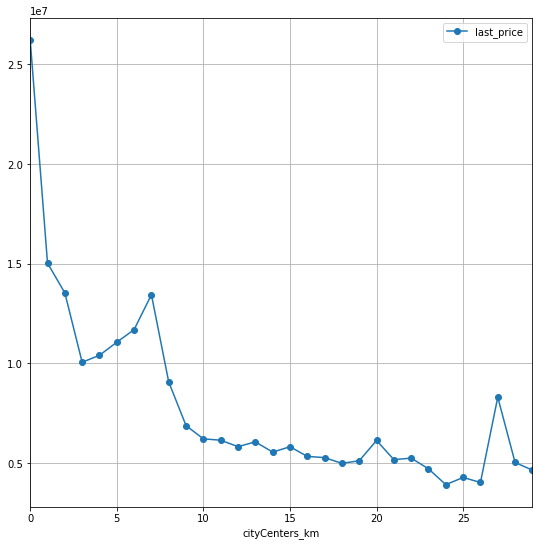

In [90]:
good_data_centers_pivot.plot(grid=True, figsize=(9, 9), style='o-')

#### Вывод: 
Резкое падение графика больше всего в промежутке от 0 до 1 км, дальше уже падением становится менее резким, а при расстоянии от 3 до 7 - средняя цена идет на увеличение до уровня 2 км. Дальше уже идет резкий спад, который не возвращается на предыдущие уровни. В связи с чем отмечает центр города как расстояние до 7 км.

### 4.7 Квартиры в центре города

In [91]:
# Будем использовать ранее созданный датафрейм good_data_centers.
# Выделим отдельно квартиры находящиеся в центре, для этого создадим датафрейм good_data_centers1
good_data_centers1 = good_data_centers.query('cityCenters_km <= 7')
good_data_centers1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 24 to 23691
Data columns (total 31 columns):
total_images              2650 non-null int64
last_price                2650 non-null float64
total_area                2650 non-null float64
first_day_exposition      2650 non-null datetime64[ns]
rooms                     2650 non-null int64
ceiling_height            2650 non-null float64
floors_total              2650 non-null int64
living_area               2650 non-null float64
floor                     2650 non-null int64
is_apartment              2650 non-null int64
studio                    2650 non-null int64
open_plan                 2650 non-null int64
kitchen_area              2650 non-null float64
balcony                   2650 non-null int64
locality_name             2650 non-null object
airports_nearest          2648 non-null float64
cityCenters_nearest       2650 non-null float64
parks_around3000          2650 non-null int64
parks_nearest             1719 non-null

In [92]:
# 2650 квартир в центре. Оставим только нужные для аналитики столбцы.
good_data_centers1 = good_data_centers1[['total_area', 'last_price', 'floor', 'per_square_meter_price', 'rooms', 'ceiling_height', 'floor_name', 'cityCenters_km', 'first_day_exposition']]
# Удалим данные с неизвестной высотой потолков
good_data_centers1 = good_data_centers1.query('ceiling_height != 0')
good_data_centers1.head(15)

,total_area,last_price,floor,per_square_meter_price,rooms,ceiling_height,floor_name,cityCenters_km,first_day_exposition
51,161.0,45000000.0,4,279503.105590,3,3.20,другой,7,2017-10-17
52,136.0,11795000.0,2,86727.941176,6,3.00,последний,7,2017-09-22
63,118.0,20000000.0,7,169491.525424,3,3.00,другой,5,2018-09-11
94,29.5,3500000.0,2,118644.067797,1,2.50,другой,7,2019-04-26
106,124.1,10500000.0,3,84609.186140,5,3.20,другой,6,2017-05-25
114,21.4,4000000.0,7,186915.887850,1,2.90,другой,6,2019-02-07
121,180.0,33000000.0,8,183333.333333,3,2.90,другой,4,2017-02-17
136,51.8,6500000.0,2,125482.625483,2,3.45,другой,4,2018-08-01
137,85.1,13310800.0,5,156413.631022,2,2.70,другой,4,2018-01-01
143,30.0,2990000.0,9,99666.666667,1,2.50,последний,6,2016-06-08


In [93]:
good_data_centers1[['total_area', 'last_price', 'rooms', 'ceiling_height', 'per_square_meter_price']].corr()

,total_area,last_price,rooms,ceiling_height,per_square_meter_price
total_area,1.000000,0.559779,0.774964,0.319698,0.180207
last_price,0.559779,1.000000,0.261653,0.180483,0.868537
rooms,0.774964,0.261653,1.000000,0.278018,-0.086630
ceiling_height,0.319698,0.180483,0.278018,1.000000,0.071183
per_square_meter_price,0.180207,0.868537,-0.086630,0.071183,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110f3da690>,
      dtype=object)

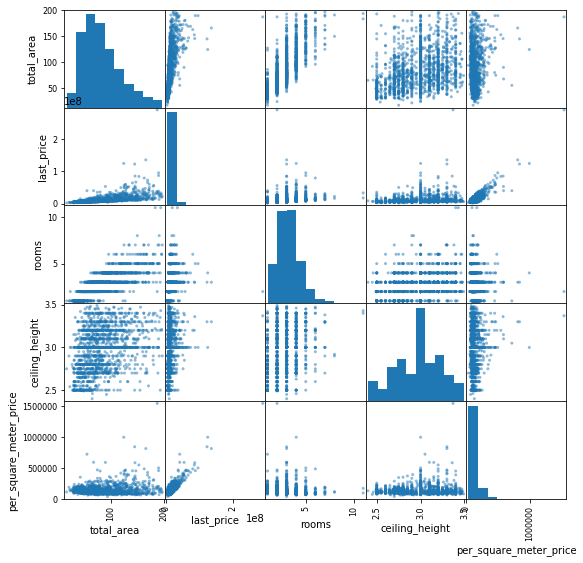

In [94]:
pd.plotting.scatter_matrix(good_data_centers1[['total_area', 'last_price', 'rooms', 'ceiling_height', 'per_square_meter_price']], figsize=(9, 9))

Можем сделать следующие выводы:
    1. Цена за квартиру увеличивается вместе с суммарной площадью, тут все обоснованно, ошибок нет
    2. Самые высокие цены за квартиры встречаются в столбцах с 3, 4 и 5 комнатами, лидируют 3 и 4 комнаты. Квартиры с         количеством комнат больше 5 в среднем дешевле, чем квартиры с 3, 4 и 5 комнатами, а значит есть влияние третих факторов     (например, высота потолков, в квартирах с более 5 комнатами куда реже встречаются потолки с высотой около 3,5 м. чем в     квартирах где 3-5 комнат).
    3. Опять-таки квартиры с потолками 3 м. - в среднем дороже остальных квартир.
    4. Статистика цены за квадратный метр: самые дорогие квартиры с потолками 3 м. и 3 комнатами. В среднем квартиры с 1-3     комнатами самые дорогие, цена за квадрат с увелечением комнат от 4 и более начинает уменьшаться. В среднем - квартиры с      потолками от 3 м. чуть дороже квартир с потолками до 3 м. 
    5. Интересная особенность, при потолках от 2,5 до 3 м. цена за квадратный метр не имеет сильно выделяющихся значений, в то  время как при высота от 3 до 3,5 м. есть выбивающиеся высокие значения (возможно, квартиры с такой высотой потолков относятся к более элитному классу квартир).

In [95]:
# Так же проверим влияние числа комнат, этажа, удалённости от центра
good_data_centers1[['floor', 'last_price', 'rooms', 'cityCenters_km', 'per_square_meter_price']].corr()

,floor,last_price,rooms,cityCenters_km,per_square_meter_price
floor,1.000000,0.123100,-0.046820,0.208978,0.132604
last_price,0.123100,1.000000,0.261653,-0.027619,0.868537
rooms,-0.046820,0.261653,1.000000,-0.212593,-0.086630
cityCenters_km,0.208978,-0.027619,-0.212593,1.000000,0.036599
per_square_meter_price,0.132604,0.868537,-0.086630,0.036599,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110f32b3d0>,
      dtype=object)

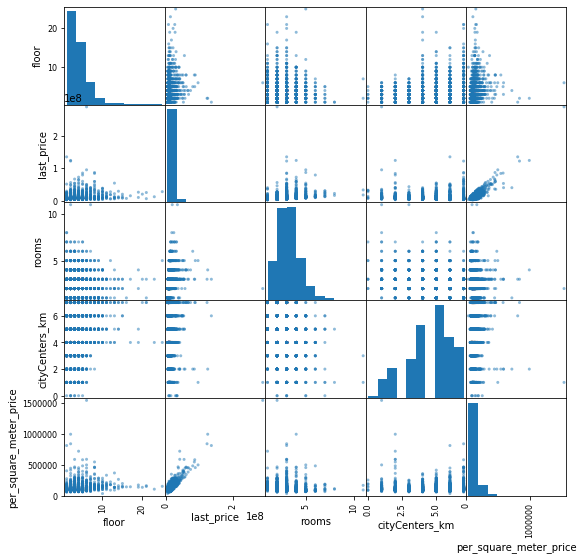

In [96]:
pd.plotting.scatter_matrix(good_data_centers1[['floor', 'last_price', 'rooms', 'cityCenters_km', 'per_square_meter_price']], figsize=(9, 9))

Вывод:
    1. Самые дорогие квартиры от 2 до 10 этажа, дальше стоимость идет на спад. Самый пик - 4 этаж. На 1 и 2 этажах встречаются самые дорогие квартиры как по общей стоимости, так и за квадратный метр (возможно, особенно на первом этаже - продажа квартир под магазины или офисные помещения).
    2. Чем ближе к центру - тем меньше квартир на первых этажах. 
    3. Интересно, но квартиры, находящиеся на чуть большем расстоянии от центра выходят в целом дороже. Можно отследить прогрессию стоимости квартир, при расстоянии от 3 до 7 км (стоимость непрерывно растет). Исключение - квартиры на расстоянии 2 км., где встречаются самые высокие значения, да и вообще тут самый больший разброс по стоимости (что вполне логично, это самый центр).
    4. Квартиры, находящиеся на 10 и более этажах имеют максимум 5 комнат. Квартиры с более чем 5 комнатами находятся до 10 этажа.

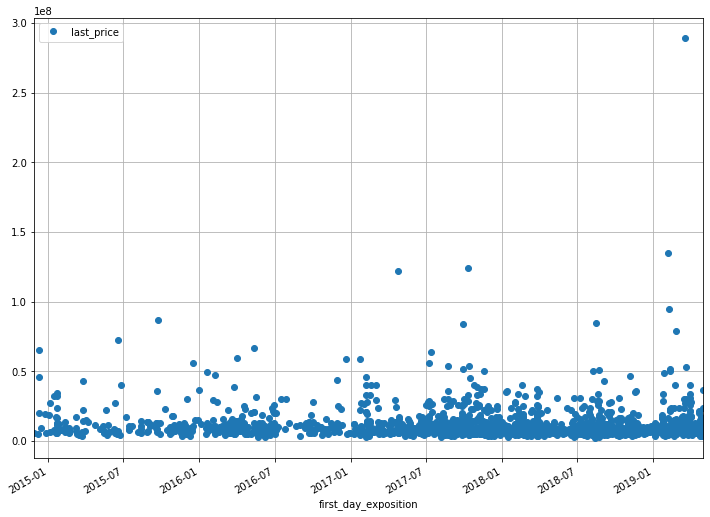

In [97]:
# Узнаем, зависит ли цена от дня публикации
good_data_centers1.plot(y='last_price', x='first_day_exposition', style='o', figsize=(12, 9), grid=True)

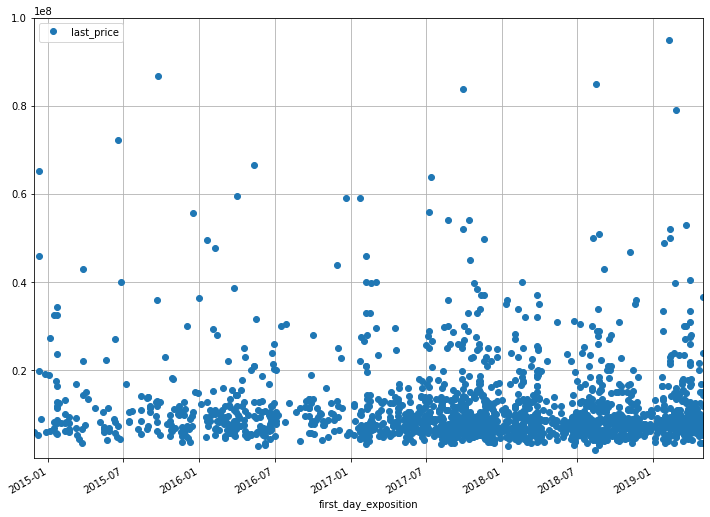

In [98]:
# Приблизим график, убрав все значения больше 10000000
good_data_centers1.plot(y='last_price', x='first_day_exposition', style='o', figsize=(12, 9), grid=True, ylim=(0.1, 100000000))

#### Вывод:
В большинстве случаев, для объявлений с более поздней датой публикации характерен больший ценовой разброс, вариантов с более дорогими квартирами куда больше, но это вполне объясняется тем, что и количество объявление так же увеличилось. Что интересно - во второй половине 2016 г. заметен небольшой спад как по количеству объявлений, так и по цене, после чего спад прекратился и количество и цена продолжили увеличиваться.

In [99]:
# Проделаем все то же самое, но для квартир по всему Санкт-Петербургу. 
# Для этого используем датафрейм good_data_centers
good_data_centers = good_data_centers[['total_area', 'last_price', 'floor', 'per_square_meter_price', 'rooms', 'ceiling_height', 'floor_name', 'cityCenters_km', 'first_day_exposition']]
# Удалим данные с неизвестной высотой потолков
good_data_centers = good_data_centers.query('ceiling_height != 0')
good_data_centers.head(15)

,total_area,last_price,floor,per_square_meter_price,rooms,ceiling_height,floor_name,cityCenters_km,first_day_exposition
0,108.0,13000000.0,8,120370.370370,3,2.70,другой,16,2019-03-07
4,100.0,10000000.0,13,100000.000000,2,3.03,другой,8,2018-06-19
9,61.0,5400000.0,7,88524.590164,3,2.50,другой,15,2017-02-26
10,39.6,5050000.0,3,127525.252525,1,2.67,другой,14,2017-11-16
16,82.0,6700000.0,1,81707.317073,3,3.05,первый,11,2017-11-23
18,31.0,3250000.0,2,104838.709677,1,2.50,другой,11,2017-01-27
19,121.0,14200000.0,8,117355.371901,3,2.75,другой,13,2019-01-09
23,32.0,2950000.0,9,92187.500000,1,2.60,последний,14,2016-10-29
25,76.0,6800000.0,18,89473.684211,2,2.75,другой,15,2015-10-01
27,70.0,7100000.0,11,101428.571429,3,2.60,другой,11,2017-05-12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110ea385d0>,
      dtype=object)

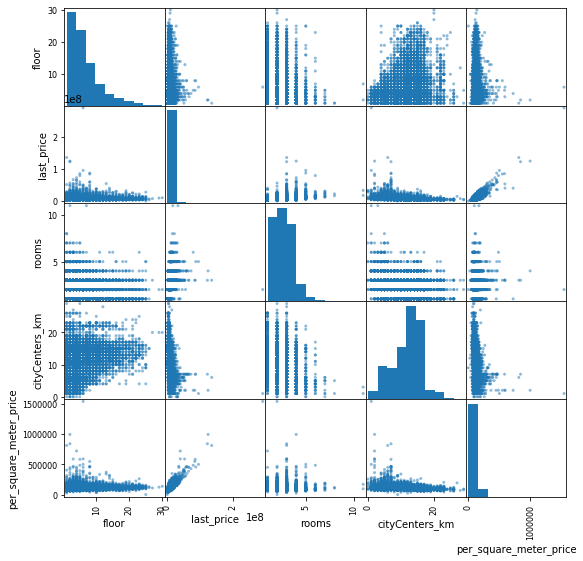

In [100]:
pd.plotting.scatter_matrix(good_data_centers[['floor', 'last_price', 'rooms', 'cityCenters_km', 'per_square_meter_price']], figsize=(9, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110e217410>,
      dtype=object)

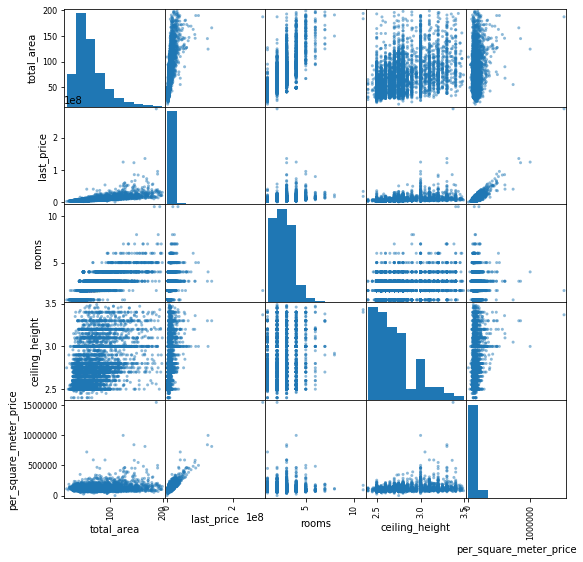

In [101]:
pd.plotting.scatter_matrix(good_data_centers[['total_area', 'last_price', 'rooms', 'ceiling_height', 'per_square_meter_price']], figsize=(9, 9))

#### Вывод:
При анализе продажи квартир во всем Санкт-Петербурге можно сделать следующие выводы:
    1. Средняя высота потолков по всему городу изменилась, теперь преобладают потолки с высотой от 2,5 до 2,8, в то время    как в центре лидировали потолки 3 м..
    2. Средняя площадь квартир так же уменьшилась, чем ближе к центру - тем квартиры просторнее.
    3. Статистика цен за квартиру и квадратный метр особо не поменялась, а значит расчеты примерно одинаковые по всему       городу
    4. Статистика цен в зависимости от расстояния от центра поменялась, теперь четко отслеживается - чем дальше от центра,   тем дешевле квартира (за исключением квартир, которые уже находятся в центре).
    5. Так же увеличились и номера этажей - в квартирах, которые далеки от центра квартиры продаются на более высоких       этажах. Чем дальше от центра, тем более высокие дома.

In [102]:
# Для интереса проверим, насколько влияет количество фотографий на среднее время продажи
good_data_image = good_data.pivot_table(index='total_images', values='days_exposition', aggfunc=['mean', 'count'])
good_data_image

,mean,count
,days_exposition,days_exposition
total_images,,
0,152.397327,823
1,199.545190,686
2,201.284112,535
3,196.147727,616
4,201.407843,765
5,193.670600,1017
6,194.114980,1235
7,179.343582,1301


Интересно, но количество фотографий не влияет в сильной мере на время продажи квартиры. Квартиры без фотографий в среднем продаются куда быстрее чем квартиры, где фотографий от 1 до 10).

### Шаг 5. Общий вывод

Для того, чтобы выявить рыночную стоимость квартиры следует учитывать одновременно много факторов, но даже они влияют по-разному. Из основных факторов следует отметить - общая площадь квартиры, населенный пункт, расстояние до центра. Чем развитее населенный пункт - тем квартиры дороже. Чем дальше квартира находится от центра - тем меньше её рыночная стоимость. 

Отдельно так же отметим и следующие параметры - этаж, количество комнат, высота потолков. Квартиры с 3 и 4 комнатами самые дорогие, тогда как после 5 комнат - чем больше комнат, тем меньше становится цена за квадратный метр. Квартиры на 1 этаже самые дешевые, самые дорогие квартиры находятся от 2 до 10 этажа (основной пик приходится на 4 этаж). Квартиры с высотой потолков 3 м - самые дорогие, при уменьшении или увеличении - цена в обоих случаях уменьшается.

При оценке стоимости так же следует учитывать и многие другие параметры, которые тоже могут влиять на стоимость, это, например, наличие поблизости парков, водоемов, аэропортов, тип квартиры.

Так же следует отметить тот факт, что чем позже публикация - тем в среднем стоимость за квартиры становится чуть больше. А значит - характерен рост цен на квартиры, который тоже следует учитывать.